  
# Stock returns analysis



In this project, we focused on using Python and Pandas to retrieve historical stock prices from Yahoo fianance to: 
1. Calculate daily returns
2. Determine portfoilio returns using two investing strategies

To start, we load all relevant packages into the python workspace

In [2]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from pandas.util.testing import assert_frame_equal

yf.pdr_override()
pd.core.common.is_list_like = pd.api.types.is_list_like 
#The following line seems to be necessary due to a newer version of pandas

## Selecting company tickers from yahoo finance 

Ten company stocks are selected at random and their corresponding ticker on yahoo finance is obtained and saved in a csv file. The table shows the company and tickers in Yahoo finance website.



 YAHOO_TICKER  | Company Name
:------------- |------------- 
 BTO.TO	       | B2Gold Corp.
 MFC.TO	       | Manulife Financial Corporation
 CVE.TO	       | Cenovus Energy Inc.
 ENB.TO	       | Enbridge Inc.
 ABX.TO	       | Barrick Gold Corporation
 K.TO	       | Kinross Gold Corporation
 HR-UN.T       | H&R Real Estate Investment Trust
 KAT.TO	       | Katanga Mining Limited
 BMO.TO	       | Bank of Montreal
 YRI.TO	       | Yamana Gold Inc.


In [3]:
directory = "https://github.com/Master-of-Business-Analytics/rmd_web_experiment/blob/master/"
#Location of the file 

filename = directory+'TSX_Listing 2019.csv'
tickers1 = pd.read_csv(filename)
tickers = list(tickers1['YAHOO_TICKER'])

The stock adjusted prices are then retrieved from yahoo finance for the time frame 31 Dec 2018 - 31 Dec 2019.

In [5]:
start = datetime.datetime(2018, 12, 31)
end = datetime.datetime(2020, 1, 1)

Extract data from yahoo finance

In [6]:
f2AAPL = pdr.get_data_yahoo("AAPL", start, end)

#Intiate the dictionnary that will store all the downloaded tick data
d = pd.DataFrame()
#Loop over each tickers to load the data to be stored in the dictionnary d
for tick in tickers:
    print('Downloading '+tick)
    try:
        f = pdr.get_data_yahoo(tick,start,end,threads=False,progress=False)
        d[tick] = f['Adj Close']  # select the adjusted close price
    except ValueError:
        print(' No data found')
        

[*********************100%***********************]  1 of 1 completed


## Plot stock price 

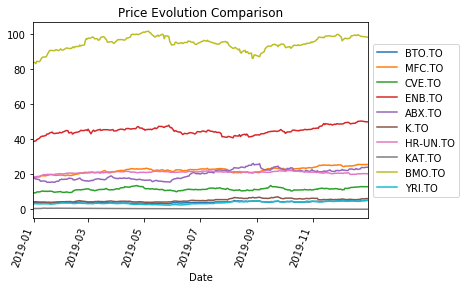

In [7]:

for i, col in enumerate(d.columns):
    d[col].plot()

plt.title('Price Evolution Comparison')

plt.xticks(rotation=70)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The graph above is useful to compare price trends from the selected companies. Most stocks have experienced are relatively constant, however Bank of Montreal has a high variation in stock price varying from 80 to 100 over the one-year period observed.

## Calculating returns

A return is the change in price on an asset or stock ,which may be represented in terms of price change or percentage change. In order to compare the stocks on a level playing field , the returns of the stocks is calculated

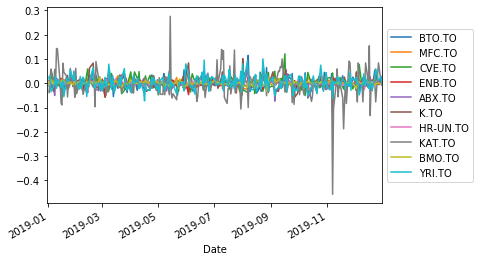

In [8]:
# how to calculate simple returns
ret = d.pct_change()


ret.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The returns of most of the stocks above, are between -0.1 and 0.1 , however Kinross Gold Corporation show large variations with a high of 0.3 and a low of -0.45. This high variability makes this stock a risky investment. To check if any of the stocks we are analyzing are correlated, a correlation matrix is created.


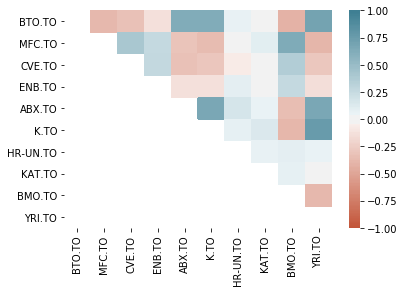

In [9]:
mask = np.tril(ret.corr())
sns.heatmap(ret.corr(), vmin=-1,cmap=sns.diverging_palette(20, 220, n=200), vmax=1, center= 0,mask=mask)

Based on the correlation matrix, the returns from H&R Real Estate Investment Trust and Katanga Mining Limited have almost no correlation with any other stock returns in the portfolio.

## Calculating stock statistics

When making a decision on what stock to invest in, there are five important statistics that are considered. These statistics are also called five moments of stock returns.

* Mean
* Stardard deviation
* Skewness
* kurtosis
* Autocorrelation

In [17]:

#mean
ret_mean=ret.mean()
lret_mean=lret.mean()

#variance
ret_var=ret.var()
lret_var=lret.var()

#standard deviation
ret_std = ret.std()
ret_std2 = pd.DataFrame(ret.std())

#skewness
#from scipy.stats import skew
ret_skew=ret.skew()
ret_kurt=ret.kurt()
lret_skew = lret.skew()
lret_kurt = lret.kurt()
#estimate autocorrelation
# source http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html

#data=ret.dropna()
autocorr_res = []
acres_ln =[]
from scipy.stats import pearsonr
for i in ret.columns:
    data0 = ret[i]
    data = data0.dropna()
    corr, pval = pearsonr(data[:-1], data[1:])
    autocorr_res.append(corr)
    data1 = lret[i]
    data = data1.dropna()
    corr, pval=pearsonr(data[:-1], data[1:])
    acres_ln.append(corr)
    
out1 = pd.DataFrame(ret_mean)
out2 = out1.rename(columns={0: 'mean'})

#Next line we join with ret_std2 instead of ret_std, because they need to be dataframes
out3 = out2.join(ret_std2)
out4 = out3.rename(columns={0: 'std'})

#autocorr_res is a list data type
out4['autocorr'] = autocorr_res

#lret_mean is a timeseries data type, take its values
out4['lmn']=lret_mean.values
out4['lstd']=lret.std().values
out4['lac']=acres_ln
out4['skew'] = ret_skew.values
out4['kurt'] = ret_kurt.values
out4['lskew'] = lret_skew.values
out4['lkurt'] = lret_kurt.values


              mean       std  autocorr       lmn      lstd       lac  \
BTO.TO    0.001358  0.023711 -0.006428  0.001080  0.023556 -0.007063   
MFC.TO    0.001462  0.011370  0.042679  0.001397  0.011365  0.044728   
CVE.TO    0.001582  0.022143 -0.040664  0.001340  0.021945 -0.037224   
ENB.TO    0.001085  0.010589 -0.066406  0.001028  0.010665 -0.067956   
ABX.TO    0.001292  0.019779  0.102820  0.001097  0.019767  0.103451   
K.TO      0.001664  0.025494  0.088500  0.001341  0.025438  0.086305   
HR-UN.TO  0.000351  0.006662  0.086162  0.000329  0.006664  0.086654   
KAT.TO   -0.003722  0.057017  0.081695 -0.005523  0.061915  0.086857   
BMO.TO    0.000670  0.007395  0.121277  0.000643  0.007410  0.120790   
YRI.TO    0.002313  0.028657 -0.011611  0.001907  0.028410 -0.010801   

              skew       kurt     lskew      lkurt  
BTO.TO    0.529725   1.672612  0.415787   1.350000  
MFC.TO   -0.141988   0.584862 -0.185324   0.603856  
CVE.TO    0.780483   3.195356  0.638783   2.6213

### Mean and standard deviation:

The standard deviation tells you how much the portfolio's return can deviate from the mean historical return. All of stocks have standard deviation that are greater than the mean, meaning that there is a higher risk, however this could be in the investor’s favour as this means above average returns.

### Skewness and Kurtosis:

Higher kurtosis means more of the variance is as a result of infrequent deviations as opposed to frequent modestly sized deviations. 50% of the stocks in the portfolio are Leptokurtic (fat tailed). In the summary table, the portfolio shows a kurtosis of 5.23 and logical kurtosis of 23, which is undesirable for investments. Enbridge Inc and Katanga Mining Limited returns have a highly skewed distribution (negative), however the skewness is decreased to symmetric distribution when the all the stock returns in the portfolio is examined.

### Autocorrelation:

With low autocorrelations of -0.1 – 0.1, the degree of similarity between a given time series and a lagged version of itself over successive time intervals is minimal thus past returns do not seem to influence future returns.


BTO.TO      0.001358
MFC.TO      0.001462
CVE.TO      0.001582
ENB.TO      0.001085
ABX.TO      0.001292
K.TO        0.001664
HR-UN.TO    0.000351
KAT.TO     -0.003722
BMO.TO      0.000670
YRI.TO      0.002313
dtype: float64


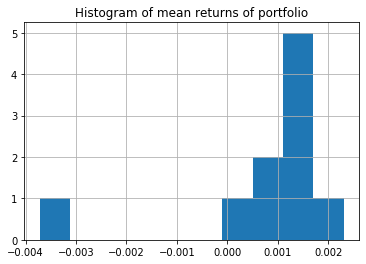

In [51]:
ret_mean.hist()
plt.title('Histogram of mean returns of portfolio')



In [42]:
ss1 = pd.DataFrame(out4.mean())
ss1 = ss1.rename(columns={0: 'summary stat mean'})
ss1['summary stat std'] = out4.std().values
print(ss1)

          summary stat mean  summary stat std
mean               0.000806          0.001680
std                0.021282          0.014822
autocorr           0.039802          0.066189
lmn                0.000464          0.002147
lstd               0.021713          0.016133
lac                0.040574          0.066250
skew              -0.181427          0.779699
kurt               3.809542          5.237033
lskew             -0.478148          1.226972
lkurt              5.740313         11.185399


### Portfolio Strategy Analysis

Managing Portfolio diversification can be carried out in two ways: stock allocation within the portfolio are rebalanced to each day or the Buy and hold option where the initial stock allocation is not changed during the total investment period.

The portfolio returns for both options are calculated in the code below where all stocks had equal weights and the cumulative returns are shown in the figure below:


In [5]:
ret2 = d.pct_change()# duplicate
meanDailyReturns = ret2.mean() #mean daily returns 
w = 1/len(d.columns)

# Define weights for the portfolio
weights = np.array([w,w,w,w,w,w,w,w,w,w])
ret2['Portfolio']= ret2.dot(weights)

# Calculate cumulative returns
daily_cum_ret=((1+ret2).cumprod())-1



Date
2019-12-23    0.180770
2019-12-24    0.191846
2019-12-27    0.201208
2019-12-30    0.210515
2019-12-31    0.209140
Name: Portfolio, dtype: float64

## Calculate porfoilio statistics

### B) rebalanced to equal weights each day

In [9]:
norm_ret = d/d.iloc[0,:]
norm_ret['returns'] = (norm_ret.sum(axis=1)/norm_ret.sum(axis=1)[0])-1


#### Plot returns comparing both returns

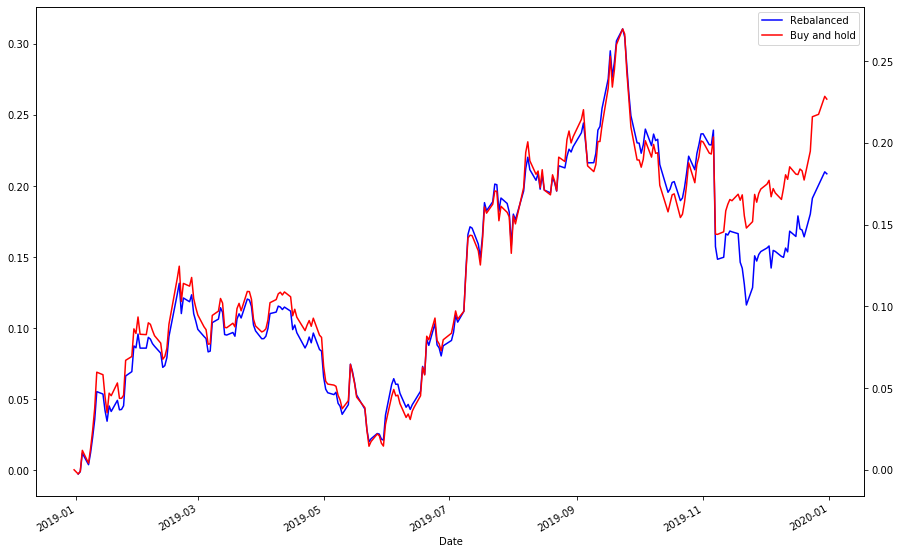

In [35]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
#rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

daily_cum_ret['Portfolio'].plot(ax=ax1, style='b-')
norm_ret['returns'].plot(ax=ax2, style='r-')


ax2.legend([ax1.get_lines()[0],
            ax2.get_lines()[0]],
           ['Rebalanced', 'Buy and hold'])

### Portfoilio Statistics

The figure above shows that the buy and hold strategy produced higher returns most of the time. At the end of the observation period the cumulative return for the rebalancing strategy is 20.85% and that of the buy and hold strategy is 22.67%.

Diversification using the buy /hold strategy and rebalancing strategies have some advantages. Examining the strategy of daily rebalancing of stocks in a portfolio is not realistic for the following reasons:

* High costs due to transaction costs and possible tax liabilities
* Time consuming as trading excess stocks and buying stocks takes time

The buy and hold option of portfolio management is a more realistic strategy given sufficient time between the rebalance process is observed. The time between rebalancing should depend on the kind of stocks in the portfolio and how much risk the owner of the portfolio is willing to take on. By waiting for too long between the rebalancing events means that the stock proportion may drift, therefore the risks are not diversified. A too short time between rebalancing periods may result in costs and may not be useful as some assets in the portfolio haven't experienced a large appreciation

## Reference

1.  http://pandas.pydata.org/pandas-docs/stable/remote_data.html
2. https://github.com/pydata/pandas/blob/master/pandas/io/data.py